In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from scipy.integrate import solve_ivp

 \begin{matrix}  
    \begin{bmatrix}
            \dot{\theta}\\
            \ddot{\theta}
    \end{bmatrix}=
    \begin{bmatrix}
            \dot{\theta}\\
            -\frac{g\sin(\theta)}{l}
    \end{bmatrix}
\end{matrix}

In [16]:
g = 9.81 #m/s^2
l = 0.5 #m

theta0 = np.deg2rad(90) #degrees
theta_dot = 0 #1/s

def pendulum_ODE(t,y):
    return (y[1],-g*np.sin(y[0])/l)

sol = solve_ivp(pendulum_ODE,[0,5],(theta0,theta_dot),t_eval=np.linspace(0,5,30*5))

theta = sol.y[0]
theta_dot = sol.y[1]
t = sol.t

theta = np.rad2deg(theta)
theta_dot = np.rad2deg(theta_dot)


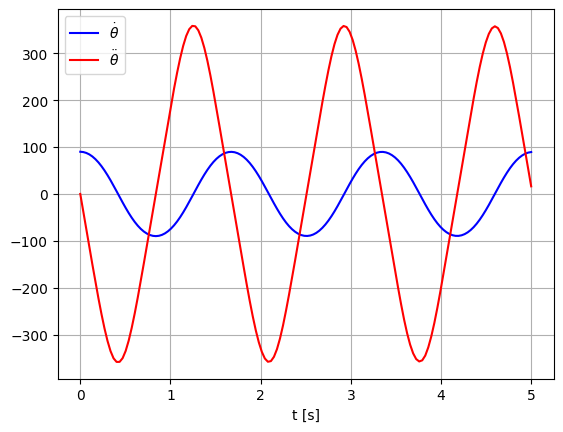

In [17]:
plt.plot(t,theta,"b",label=r"$\dot \theta$")
plt.plot(t,theta_dot,"r",label=r"$\ddot \theta$")
plt.legend()
plt.xlabel("t [s]")

plt.grid(True)

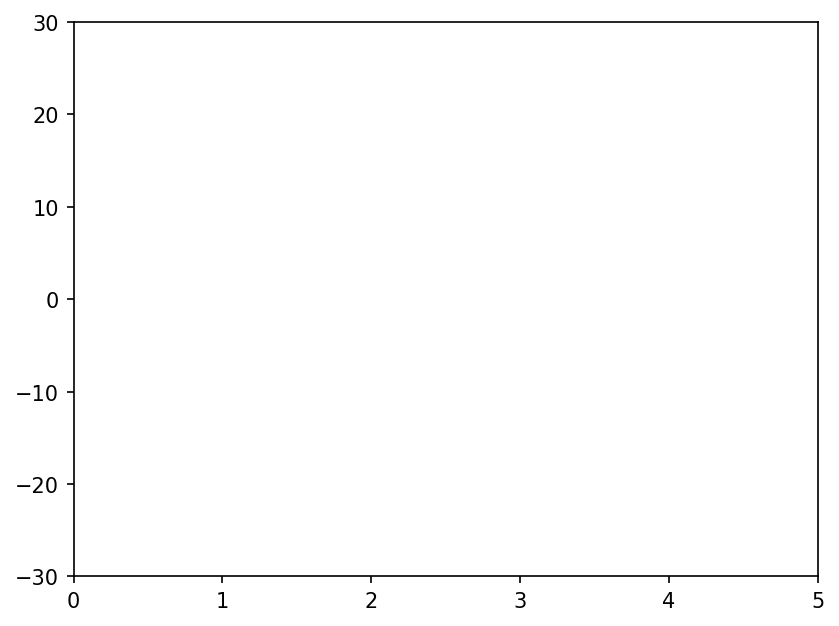

In [72]:
fig, ax = plt.subplots()

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150
ax.set_xlim(0,5)
ax.set_ylim(-30,30)

theta_curve, = ax.plot(t[0],theta[0],"b")
theta_dot_curve, = ax.plot(t[0],theta_dot[0],"r")


def animate(i):
    theta_curve.set_data(t[:i+1],theta[:i+1])
    theta_dot_curve.set_data(t[:i+1],theta_dot[:i+1])

ani = animation.FuncAnimation(fig,animate,frames=len(t))
ffmpegwriter = animation.FFMpegWriter(fps=30)
ani.save("test.mp4",writer=ffmpegwriter)